# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Prerequisites

To follow along with this project, you should have a basic understanding of Python programming and data analysis concepts. In addition, you may want to use the following packages in your Python environment:

- pandas
- Matplotlib
- ...

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Twitter_Analysis.csv')
df

,Date,Category,Likes,Shares,Reposts,Comments
0,2015-01-01,Culture,3457,815,193,7965
1,2015-01-01,Health,348,32,163,7740
2,2015-01-01,Health,3450,119,60,6723
3,2015-01-01,Health,9678,129,5,5255
4,2015-01-01,Food,5195,633,129,9021
...,...,...,...,...,...,...
89995,2023-12-30,Health,4618,398,103,9278
89996,2023-12-30,Family,2792,218,196,1587
89997,2023-12-30,Travel,1056,603,154,8975
89998,2023-12-30,Fashion,3263,838,46,1983


In [4]:
df.describe()

,Likes,Shares,Reposts,Comments
count,90000.000000,90000.000000,90000.000000,90000.000000
mean,4986.537789,500.090056,99.066789,5001.240967
std,2886.780782,287.712269,57.691723,2882.383784
min,0.000000,0.000000,0.000000,0.000000
25%,2487.750000,251.000000,49.000000,2514.000000
50%,4976.000000,499.000000,99.000000,5012.500000
75%,7479.000000,749.000000,149.000000,7498.250000
max,9999.000000,999.000000,199.000000,9999.000000


# In Depth Analysis

In [5]:
df.head

<bound method NDFrame.head of              Date Category  Likes  Shares  Reposts  Comments
0      2015-01-01  Culture   3457     815      193      7965
1      2015-01-01   Health    348      32      163      7740
2      2015-01-01   Health   3450     119       60      6723
3      2015-01-01   Health   9678     129        5      5255
4      2015-01-01     Food   5195     633      129      9021
...           ...      ...    ...     ...      ...       ...
89995  2023-12-30   Health   4618     398      103      9278
89996  2023-12-30   Family   2792     218      196      1587
89997  2023-12-30   Travel   1056     603      154      8975
89998  2023-12-30  Fashion   3263     838       46      1983
89999  2023-12-31   Health   8825     485       43      6698

[90000 rows x 6 columns]>

In [6]:
df.tail

<bound method NDFrame.tail of              Date Category  Likes  Shares  Reposts  Comments
0      2015-01-01  Culture   3457     815      193      7965
1      2015-01-01   Health    348      32      163      7740
2      2015-01-01   Health   3450     119       60      6723
3      2015-01-01   Health   9678     129        5      5255
4      2015-01-01     Food   5195     633      129      9021
...           ...      ...    ...     ...      ...       ...
89995  2023-12-30   Health   4618     398      103      9278
89996  2023-12-30   Family   2792     218      196      1587
89997  2023-12-30   Travel   1056     603      154      8975
89998  2023-12-30  Fashion   3263     838       46      1983
89999  2023-12-31   Health   8825     485       43      6698

[90000 rows x 6 columns]>

In [7]:
df.dtypes

Date        object
Category    object
Likes        int64
Shares       int64
Reposts      int64
Comments     int64
dtype: object

In [25]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [27]:
df['Category'] = df['Category'].astype('category')

In [9]:
df_numeric = df.select_dtypes(include='number')
df_numeric.corr()

,Likes,Shares,Reposts,Comments
Likes,1.000000,0.003830,-0.000927,0.003539
Shares,0.003830,1.000000,0.001964,0.000217
Reposts,-0.000927,0.001964,1.000000,-0.001729
Comments,0.003539,0.000217,-0.001729,1.000000


In [11]:
numeric_features = df.select_dtypes(include=[np.int64])

numeric_features.columns

Index(['Likes', 'Shares', 'Reposts', 'Comments'], dtype='object')

In [12]:
categorical_features = df.select_dtypes(include=[object])

categorical_features.columns

Index(['Date', 'Category'], dtype='object')

In [13]:
df.skew

<bound method DataFrame.skew of              Date Category  Likes  Shares  Reposts  Comments
0      2015-01-01  Culture   3457     815      193      7965
1      2015-01-01   Health    348      32      163      7740
2      2015-01-01   Health   3450     119       60      6723
3      2015-01-01   Health   9678     129        5      5255
4      2015-01-01     Food   5195     633      129      9021
...           ...      ...    ...     ...      ...       ...
89995  2023-12-30   Health   4618     398      103      9278
89996  2023-12-30   Family   2792     218      196      1587
89997  2023-12-30   Travel   1056     603      154      8975
89998  2023-12-30  Fashion   3263     838       46      1983
89999  2023-12-31   Health   8825     485       43      6698

[90000 rows x 6 columns]>

In [14]:
df.describe(include=['object'])

,Date,Category
count,90000,90000
unique,3287,8
top,2015-01-01,Food
freq,28,11400


In [15]:
df.describe(include=['int64'])

,Likes,Shares,Reposts,Comments
count,90000.000000,90000.000000,90000.000000,90000.000000
mean,4986.537789,500.090056,99.066789,5001.240967
std,2886.780782,287.712269,57.691723,2882.383784
min,0.000000,0.000000,0.000000,0.000000
25%,2487.750000,251.000000,49.000000,2514.000000
50%,4976.000000,499.000000,99.000000,5012.500000
75%,7479.000000,749.000000,149.000000,7498.250000
max,9999.000000,999.000000,199.000000,9999.000000


# Exploratory Data Analysis

In [16]:
df['Category'].value_counts()

Category
Food       11400
Music      11326
Culture    11307
Fitness    11261
Family     11240
Travel     11238
Fashion    11126
Health     11102
Name: count, dtype: int64

In [17]:
df_group = df[['Category','Likes','Reposts']]

In [18]:
df_group = df_group.groupby(['Category'],as_index=False).mean()
df_group

,Category,Likes,Reposts
0,Culture,4986.899443,97.875829
1,Family,4986.717349,98.691103
2,Fashion,5032.319702,98.979687
3,Fitness,4987.716455,99.638842
4,Food,4985.353509,98.617368
5,Health,4935.008557,99.266078
6,Music,5018.132615,99.976956
7,Travel,4959.752358,99.495551


In [19]:
# grouping results
df_gptest = df[['Category','Likes','Reposts']]
grouped_test1 = df_gptest.groupby(['Category','Reposts'],as_index=False).mean()
grouped_test1

,Category,Reposts,Likes
0,Culture,0,4655.561644
1,Culture,1,4972.683333
2,Culture,2,4605.697368
3,Culture,3,5398.559322
4,Culture,4,4537.196970
...,...,...,...
1595,Travel,195,4943.927273
1596,Travel,196,5005.847222
1597,Travel,197,4997.031250
1598,Travel,198,4710.854545


# Pearson Correlation helps in defining Linear Correlation between two variables.

In [20]:
from scipy import stats
#Let's calculate the Pearson Correlation Coefficient and P-value of different variables.

cols = ['Likes', 'Shares', 'Reposts', 'Comments']

for col in cols:
    pearson_coef, p_value = stats.pearsonr(df[col], df['Likes'])
    print("The PearsonR between {} and Likes is {} with a P-value of P = {}".format(
          col, round(pearson_coef,4), round(p_value,4) ))

    if p_value < 0.001:
        print('Correlation between {} and Likes is statistically significant..'.format(col))
    elif p_value < 0.05:
        print('Correlation between {} and Likes is statistically moderate..'.format(col))
    elif p_value < 0.1:
        print('Correlation between {} and Likes is statistically weak..'.format(col))
    else:
        print('Correlation between {} and Likes is statistically not significant..'.format(col))

    if pearson_coef > 0 :
        if pearson_coef > 0.85:
            print('Coeff ~{} shows that the relationship is positive and very strong.\n'.format(round(pearson_coef,4)))
        elif pearson_coef > 0.75 :
            print('Coeff ~{} shows that the relationship is positive and quite strong.\n'.format(round(pearson_coef,4)))
        elif pearson_coef > 0.60:
            print('Coeff ~{} shows that the relationship is positive and moderately strong.\n'.format(round(pearson_coef,4)))
        elif pearson_coef > 0.50 :
            print('Coeff ~{} shows that the relationship is positive and only moderate.\n'.format(round(pearson_coef,4)))
        else:
            print('Coefficient ~{} shows that the relationship is positive and weak.\n'.format(round(pearson_coef,4)))
    else:
        if abs(pearson_coef) > 0.85:
            print('Coeff ~{} shows that the relationship is negative and very strong.\n'.format(round(pearson_coef,4)))
        elif abs(pearson_coef) > 0.75 :
            print('Coeff ~{} shows that the relationship is negative and quite strong.\n'.format(round(pearson_coef,4)))
        elif abs(pearson_coef) > 0.60:
            print('Coeff ~{} shows that the relationship is negative and moderately strong.\n'.format(round(pearson_coef,4)))
        elif abs(pearson_coef) > 0.50 :
            print('Coeff ~{} shows that the relationship is negative and only moderate.\n'.format(round(pearson_coef,4)))
        else:
            print('Coefficient ~{} shows that the relationship is negative and weak.\n'.format(round(pearson_coef,4)))

     

The PearsonR between Likes and Likes is 1.0 with a P-value of P = 0.0
Correlation between Likes and Likes is statistically significant..
Coeff ~1.0 shows that the relationship is positive and very strong.

The PearsonR between Shares and Likes is 0.0038 with a P-value of P = 0.2506
Correlation between Shares and Likes is statistically not significant..
Coefficient ~0.0038 shows that the relationship is positive and weak.

The PearsonR between Reposts and Likes is -0.0009 with a P-value of P = 0.7809
Correlation between Reposts and Likes is statistically not significant..
Coefficient ~-0.0009 shows that the relationship is negative and weak.

The PearsonR between Comments and Likes is 0.0035 with a P-value of P = 0.2884
Correlation between Comments and Likes is statistically not significant..
Coefficient ~0.0035 shows that the relationship is positive and weak.



# Graphical Analysis

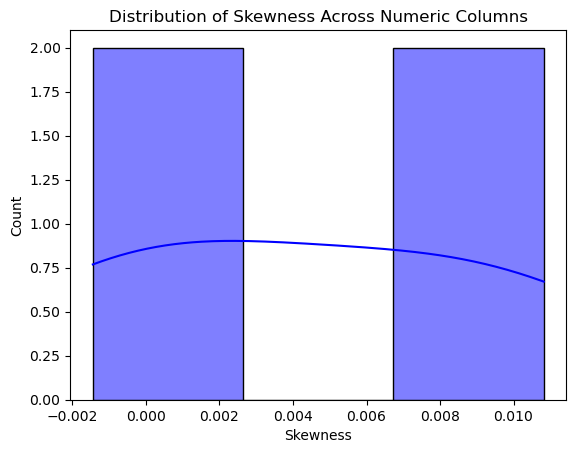

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df.skew(numeric_only=True), kde=True, color='blue')
plt.xlabel('Skewness')
plt.title('Distribution of Skewness Across Numeric Columns')
plt.show()


# A distplot infers the distribution of a variable.

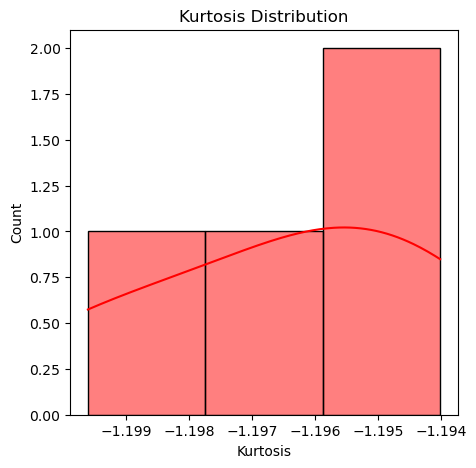

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
sns.histplot(df.kurt(numeric_only=True), color='r', kde=True)
plt.xlabel("Kurtosis")
plt.title("Kurtosis Distribution")
plt.show()


# A heatmap shows the variation of a continuous value across two dimensions.

Index(['Likes', 'Shares', 'Comments', 'Reposts'], dtype='object')


<Axes: >

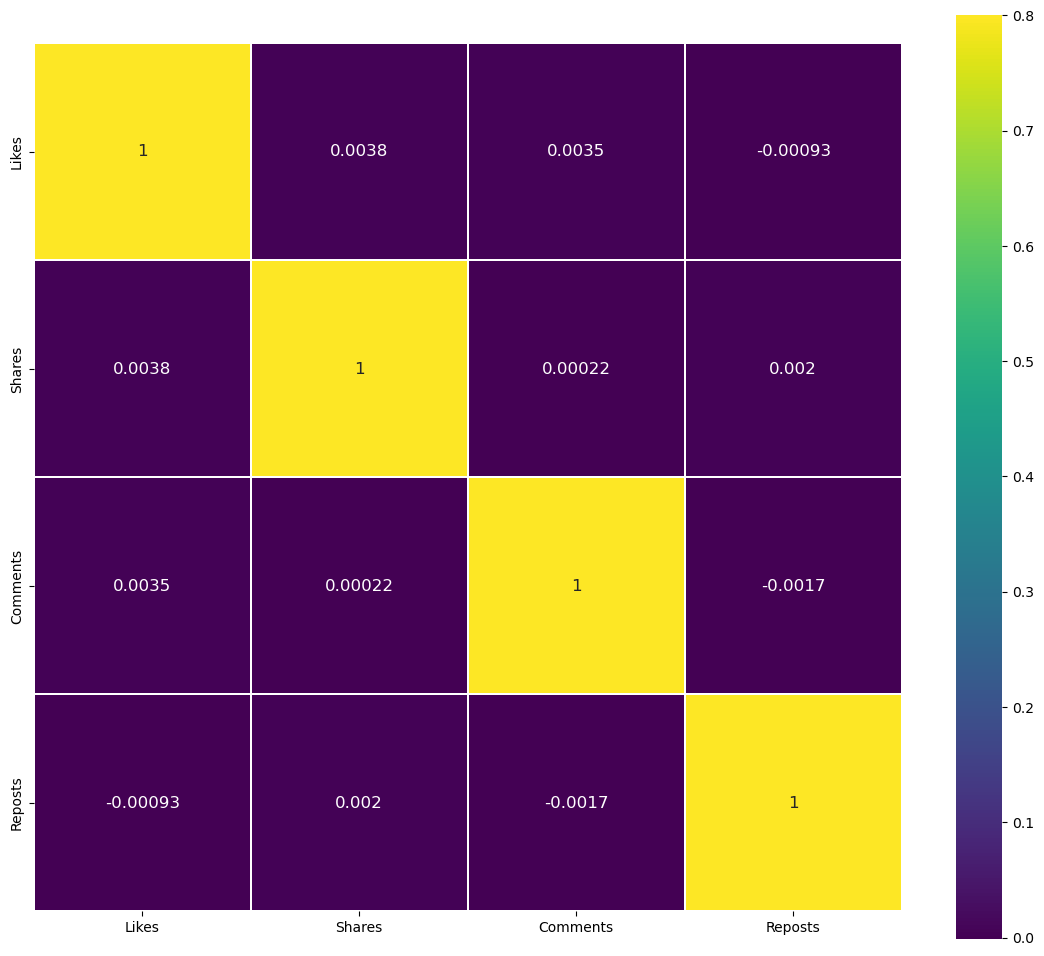

In [31]:
k= 11
correlation = numeric_features.corr()
cols = correlation.nlargest(k,'Likes')['Likes'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)